In [1]:
import pandas as pd
import numpy as np
import csv
import random as rnd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mtpl
import matplotlib.patches as patches
%matplotlib inline

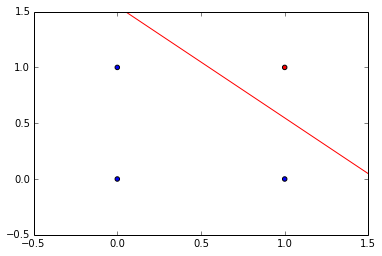

In [3]:
#Datos:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

#Declaración de variables:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

#Operaciones, grafo:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(5000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Visualizar la partición del espacio:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
m=((w[0]/w[2]))/((-w[0]/w[1]))
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.show()

#Cerrar sesión:
sess.close()

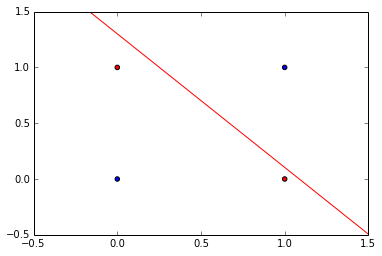

In [5]:
#Datos:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

#Declaración de variables:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

#Operaciones, grafo:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(5000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Visualizar la partición del espacio:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
m=((w[0]/w[2]))/((-w[0]/w[1]))
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.show()

#Cerrar sesión:
sess.close()

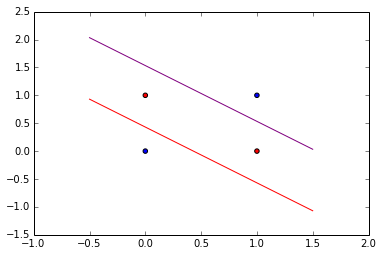

In [7]:
#Datos:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

#Declaración de variables:
input_size=2
hiden_size=2
output_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
weights = {
    'w_hl': tf.Variable(tf.random_uniform([input_size, hiden_size])),
    'w_out': tf.Variable(tf.random_uniform([hiden_size, output_size]))
}
biases = {
    'b_hl': tf.Variable(tf.zeros([hiden_size])),
    'b_out': tf.Variable(tf.zeros([output_size]))
}

#Modelo, grafo:
# Cada oculta completamente conectada:
hlayer = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['w_hl']), biases['b_hl']))
# Salida completamente conectada (una salida)
y = tf.nn.sigmoid(tf.matmul(hlayer, weights['w_out']) + biases['b_out'])
#Funcion de pérdida
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#Optimizador
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: X, y_: Y})
        
#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Visualizar la partición del espacio:
bs=[sess.run(biases["b_hl"], feed_dict={x: X, y_: Y})][0]
ws=[sess.run(weights["w_hl"], feed_dict={x: X, y_: Y})][0]

x2 = np.linspace(-0.5,1.5,100) # 100 numeros espaciados
recta1 = -bs[0]/ws[1,0]-ws[0,0]*x2/ws[1,0]
recta2 = -bs[1]/ws[1,1]-ws[0,1]*x2/ws[1,1]

plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])

plt.plot(x2,recta1,color='red')
plt.plot(x2,recta2,color='purple')
#plt.ylim([-0.5,1.5])
#plt.xlim([-0.5,1.5])
plt.show()

#Cerrar sesión:
sess.close()

('hiden_size: ', 1, ' neuronas')


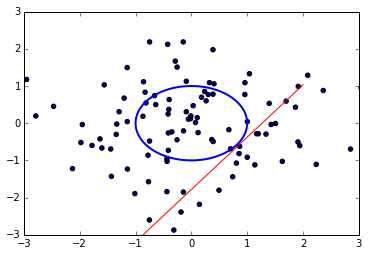

('hiden_size: ', 2, ' neuronas')


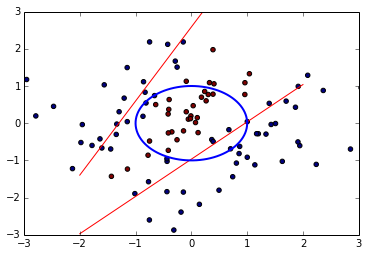

('hiden_size: ', 3, ' neuronas')


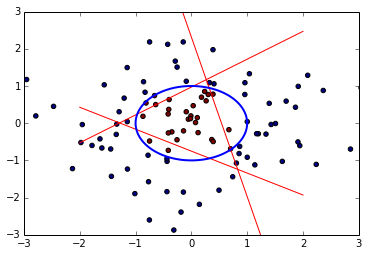

('hiden_size: ', 4, ' neuronas')


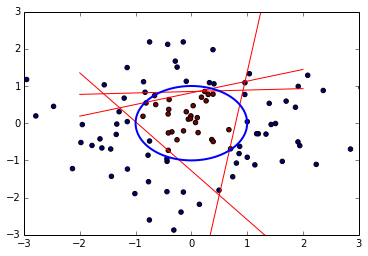

('hiden_size: ', 5, ' neuronas')


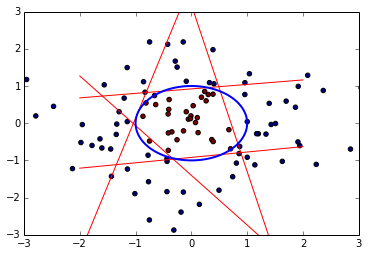

('hiden_size: ', 6, ' neuronas')


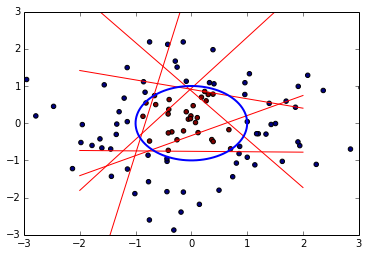

('hiden_size: ', 7, ' neuronas')


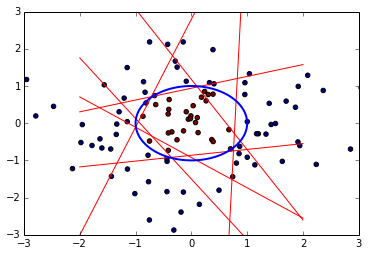

('hiden_size: ', 8, ' neuronas')


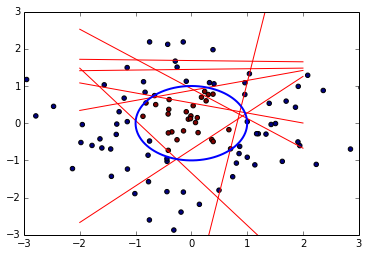

('hiden_size: ', 9, ' neuronas')


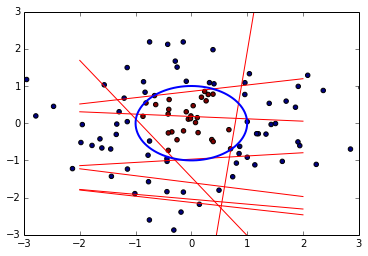

In [12]:
#Datos:
npuntos = 100
mu = 0
var = 1
X = np.random.normal(mu, var, [npuntos,2])
Y = 1.0*np.array(X[:,0]**2 + X[:,1]**2 < var**2).reshape(npuntos,1)
#print(X)
#print(Y)

#Declaración de variables:
input_size=2
output_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_size]) #la y real

numNeuronas = 10
accG = np.zeros(numNeuronas-1)

for hiden_size in range(1,numNeuronas):
    #La variables para lo que se va a ir calculando y modificando en el camino
    weights = {
        'w_h': tf.Variable(tf.random_uniform([input_size, hiden_size], -1, 1)),
        'w_out': tf.Variable(tf.random_uniform([hiden_size, output_size], -1, 1))
    }
    biases = {
        'b_h': tf.Variable(tf.zeros([hiden_size])),
        'b_out': tf.Variable(tf.zeros([output_size]))
    }

    #Modelo, grafo:
    # Capa oculta completamente conectada:
    hlayer = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['w_h']), biases['b_h']))
    # Salida completamente conectada (una salida)
    y = tf.nn.sigmoid(tf.matmul(hlayer, weights['w_out']) + biases['b_out'])
    #Funcion de pérdida
    lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
    #Optimizador
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(lossfn)

    #Ejeción del programa:
    init = tf.global_variables_initializer()
    sess = tf.Session() # tipo de sesion, puede ser interactiva
    #Cuantificar el error:
    correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operaciones
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess.run(init)
    n = 1000
    acc = np.zeros(n)
    for i in range(n):
        aux, acc[i] = sess.run([train_step,accuracy], feed_dict={x: X, y_: Y})
        #acc[i] = sess.run(accuracy, feed_dict={x: X, y_: Y})

    print("hiden_size: ",hiden_size," neuronas")
    accG[hiden_size-1] = sess.run(accuracy, feed_dict={x: X, y_: Y})*100
    


    #Visualizar la partición del espacio:
    bs=[sess.run(biases["b_h"], feed_dict={x: X, y_: Y})][0]
    ws=[sess.run(weights["w_h"], feed_dict={x: X, y_: Y})][0]

    #plt.subplot(1,2,2)

    ng=100
    x2 = np.linspace(-2*var,2*var,ng)
    Y2 = sess.run(tf.round(y), feed_dict={x: X, y_: Y})
    plt.scatter(X[:,0],X[:,1],c=Y2)
    rectas = np.zeros((hiden_size,ng))
    for i in range(0,hiden_size):
        rectas[i] = -bs[i]/ws[1,i]-ws[0,i]*x2/ws[1,i]
        plt.plot(x2,rectas[i],color='red')

    #Circulo:
    xC = np.linspace(0,2*3.1415,ng) # 100 numeros espaciados
    plt.plot(var*np.sin(xC),var*np.cos(xC), linewidth=2)


    plt.xlim(-3*var,3*var)
    plt.ylim(-3*var,3*var)
    plt.show()




In [13]:
#Cerrar sesión:
sess.close()